In [0]:
import requests
res = requests.get('https://news.ltn.com.tw/list/breakingnews')

In [2]:
res

<Response [200]>

In [0]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text,'lxml')

In [0]:
newsary = []
for li in soup.select('ul.list li'):
  #print(li)
  title = li.select_one('.title').text
  dt = li.select_one('.time').text
  link = li.select_one('a').get('href')
  newsary.append({'title':title, 'time': dt, 'link':link})

In [16]:
import pandas
newsdf = pandas.DataFrame(newsary)
newsdf.head()

,title,time,link
0,5/9重要財經新聞一覽,09:34,https://ec.ltn.com.tw/article/breakingnews/315...
1,台灣史前館開館19年首次大改造 本月底封館到明年,09:33,https://news.ltn.com.tw/news/life/breakingnews...
2,「我不是股神的粉絲」馬斯克：巴菲特的工作真的很無聊,09:29,https://ec.ltn.com.tw/article/breakingnews/315...
3,武漢肺炎疫情任務 學者：中國解放軍發揮兵力有限,09:27,https://news.ltn.com.tw/news/world/breakingnew...
4,今晴朗炎熱！明晚梅雨季首道鋒面到 全台嚴防劇烈天氣,09:27,https://news.ltn.com.tw/news/life/breakingnews...


## 自由時報爬蟲 

In [0]:
import requests
res = requests.get('https://news.ltn.com.tw/ajax/breakingnews/all/4')

In [0]:
jd = res.json()

In [0]:
import pandas
df = pandas.DataFrame(jd['data'].values())
#df

In [0]:
import time
newsary = []

for i in range(2,5):
  res = requests.get('https://news.ltn.com.tw/ajax/breakingnews/all/{}'.format(i))
  time.sleep(2)
  #print(res.json())
  jd = res.json()
  df = pandas.DataFrame(jd['data'].values())
  newsary.append(df)

In [0]:
newsdf = pandas.concat(newsary)

In [118]:
newsdf.head()

,no,title,bigphoto_flag,photo_S,photo_L,url,time,type_en,group,type_cn,local,summary,video,localUrl,tagUrl,style,tagText
0,3159956,投票日為立委候選人發簡訊拉票 男子恐被罰50萬元,0,http://img.ltn.com.tw/Upload/news/300/2020/05/...,http://img.ltn.com.tw/Upload/news/600/2020/05/...,https://news.ltn.com.tw/news/society/breakingn...,09:57,society,breakingnews,社會,屏東縣,今年1月11日總統及立委選舉投票日當天，男子違規為屏東縣無黨籍立委候選人鄭朝明發送助選簡訊，...,0,list/breakingnews/Pingtung,list/breakingnews/society,None,社會
1,3159955,罷韓團體深夜「洗地板」 高市府：清潔同仁維護市容很辛苦,0,http://img.ltn.com.tw/Upload/news/300/2020/05/...,http://img.ltn.com.tw/Upload/news/600/2020/05/...,https://news.ltn.com.tw/news/politics/breaking...,09:55,politics,breakingnews,政治,高雄市,［記者黃旭磊／高雄報導］台灣基進昨日深夜11點許於高雄市四維行政中心前人行道上，以強力水柱清...,0,list/breakingnews/Kaohsiung,list/breakingnews/politics,None,政治
2,3159953,中國助藍營、韓國瑜賄選案 陸委會：不適用「反滲透法」,0,http://img.ltn.com.tw/Upload/news/300/2020/05/...,http://img.ltn.com.tw/Upload/news/600/2020/05/...,https://news.ltn.com.tw/news/politics/breaking...,09:48,politics,breakingnews,政治,False,中國湖南省台辦等單位去年底涉嫌提供台商資金，並資助機票要求拉抬國民黨總統候選人韓國瑜選情，對...,0,,list/breakingnews/politics,None,政治
3,3159926,軍情動態》軍用無人機也能用租的！希臘向以色列租用多架防禦邊境,1,http://img.ltn.com.tw/Upload/news/300/2020/05/...,http://img.ltn.com.tw/Upload/news/600/2020/05/...,https://news.ltn.com.tw/news/world/breakingnew...,09:45,world,breakingnews,國際,False,希臘國防部將向以色列租用無人機防禦邊境，這在預算拮据時無疑是昂貴軍購的替代方案之一。希臘租賃...,0,,list/breakingnews/world,None,國際
4,40346,今年第一季手機銷售排行 Top 10 出爐！Android 旗艦全陣亡,0,http://img.ltn.com.tw/Upload/3c/page/2020/05/0...,http://img.ltn.com.tw/Upload/3c/page/2020/05/0...,http://3c.ltn.com.tw/news/40346,09:35,,3c,,False,市調機構 Canalys 近期釋出最新資料，公開 2020 年第一季出貨量排名前 10 名的...,0,,list/3c/3c,None,3C


## Numpy

In [0]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

In [19]:
for i in range(len(a)):
  print(a[i] * b[i])

2
12
30
56
90


In [20]:
for rec in zip(a,b):
  print(rec)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [21]:
for i,j in zip(a,b):
  print(i*j)

2
12
30
56
90


In [0]:
import numpy

In [0]:
na = numpy.array(a)
nb = numpy.array(b)

In [24]:
na * nb

array([ 2, 12, 30, 56, 90])

In [0]:
import numpy as np
my_list = [1,2,3]
np_my_list = np.array(my_list)

In [26]:
type(my_list)

list

In [27]:
type(np_my_list)

numpy.ndarray

In [28]:
my_list.append(4)
my_list

[1, 2, 3, 4]

In [29]:
np_my_list.append(4)

AttributeError: ignored

In [30]:
my_matrix =[[1,2,3],[4,5,6],[7,8,9]]
np.array(my_matrix)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [32]:
np.arange(0,10)
np.arange(0,11,2)


array([ 0,  2,  4,  6,  8, 10])

In [36]:
np.zeros(3)
np.zeros((5,5))
np.ones(3)
np.ones((3,3))


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [39]:
np.linspace(0,10,3)
#np.linspace(0,10,50)

array([ 0.,  5., 10.])

In [40]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [46]:
np.random.rand(2)
np.random.rand(5,5)
np.random.randn(2)
np.random.randn(5,5)
np.random.randint(1,100)
np.random.randint(1,42,6)

array([14,  2, 28,  1, 38, 24])

In [49]:
arr = np.arange(25)
arr
arr.reshape(5,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [0]:
ranarr =np.random.randint(0,50,10)

In [55]:
ranarr

array([41,  6,  8, 15,  4,  3, 41, 28, 39, 11])

In [59]:
ranarr.max()
ranarr.argmax()
ranarr.min()
ranarr.argmin()

5

In [60]:
arr.shape

(25,)

In [61]:
arr.reshape(1,25)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24]])

In [62]:
arr.reshape(1,25).shape

(1, 25)

In [63]:
arr.reshape(25,1)
arr.reshape(25,1).shape

(25, 1)

In [64]:
arr.dtype

dtype('int64')

In [66]:
arr = np.arange(0,11)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [68]:
arr[8]
arr[1:5]

array([1, 2, 3, 4])

In [70]:
arr = np.arange(0,11)
slice_of_arr = arr[0:6]
slice_of_arr

array([0, 1, 2, 3, 4, 5])

In [0]:
slice_of_arr[:]=99

In [72]:
arr

array([99, 99, 99, 99, 99, 99,  6,  7,  8,  9, 10])

In [73]:
arr_2d = np.array(([5,10,15],[20,25,30],[35,40,45]))
arr_2d

array([[ 5, 10, 15],
       [20, 25, 30],
       [35, 40, 45]])

In [74]:
arr_2d[1]

array([20, 25, 30])

In [75]:
arr_2d[1][0]

20

In [76]:
arr_2d[1,0]

20

In [77]:
arr_2d[2]

array([35, 40, 45])

In [78]:
arr_2d[2,:]

array([35, 40, 45])

In [80]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [83]:
arr > 4
bool_arr = arr>4
bool_arr

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [84]:
arr[bool_arr]

array([ 5,  6,  7,  8,  9, 10])

In [0]:
arr = np.arange(0,10)

In [91]:
arr + arr
arr * arr
arr - arr
arr/arr
1/arr
arr**3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [96]:
np.sqrt(arr)
np.exp(arr)
np.max(arr)
np.sin(arr)
np.log(arr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458])

In [97]:
x = np.array([1,2,3,4])
w1 = np.random.randn(4,5)
w1

array([[-1.52107409, -0.02094996, -0.60103684, -1.43694666, -0.24985876],
       [-1.27630083, -1.18650098, -0.40011362, -0.72616762,  0.41418953],
       [ 0.57777188, -0.05149915,  0.90496268,  0.89425989, -2.01482075],
       [ 0.3847239 , -1.94383445,  0.97267206, -1.45304797, -0.46475448]])

In [98]:
np.dot(x,w1)

array([ -0.80146449, -10.32378719,   5.2043122 ,  -6.0186941 ,
        -7.3249599 ])

In [0]:
w2 = np.random.randn(5,3)

In [100]:
np.dot(np.dot(x,w1),w2)

array([-5.80383553, 28.10312297, -3.63173805])

## Pandas

In [0]:
na = np.array([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M',35], 
               ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])

In [120]:
na

array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], dtype='<U5')

In [121]:
na[:,2]

array(['29', '23', '35', '33', '21', '20'], dtype='<U5')

In [123]:
na[:,2].astype(int).mean()

26.833333333333332

In [0]:
na = np.array([['name', 'gender', 'age'], ['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])

In [125]:
na

array([['name', 'gender', 'age'],
       ['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], dtype='<U6')

In [128]:
na[1:,2].astype(int).mean()

26.833333333333332

In [131]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
                    ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
#print(df)
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [132]:
df.columns=['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


## Pandas Series

In [0]:
import numpy as np
import pandas as pd


In [0]:
labels = ['a','b','c']
my_list = [10,20,30]


In [135]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [136]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [0]:
s = pd.Series(my_list,labels)

In [139]:
s[0]

10

In [140]:
s['a']

10

In [141]:
d = {'a':10,'b':20,'c':30}
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [0]:
ser1 = pd.Series([1,2,3,4],index = ['USA','Germany','USSR', 'Japan'])
ser2 = pd.Series([1,2,5,4],index = ['USA','Germany','Italy', 'Japan'])


In [143]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [144]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [145]:
ser1['USA']

1

In [146]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

In [0]:
# nan: not a number

## Pandas DataFrame

In [148]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [0]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35], ['ted','M', 33],
                   ['jean', 'F', 21], ['lisa', 'F', 20]], columns = ['name', 'gender', 'age'])

In [0]:
df = pd.DataFrame([{'name':'frank','gender':'M', 'age':29}, 
{'name':'mary','gender':'F', 'age':23}, 
{'name':'tom','gender':'M', 'age':35}, 
{'name':'ted','gender':'M', 'age':33}, 
{'name':'jean','gender':'F', 'age':21}, 
{'name':'lisa','gender':'F', 'age':20}])


In [0]:
df = pd.DataFrame([{'name': 'qoo', 'age':12, 'gender':'M'}, 
 {'name': 'Mary', 'gender': 'F'}])

In [152]:
df

,name,age,gender
0,qoo,12.0,M
1,Mary,NaN,F


In [0]:
df = pd.DataFrame([{'name':'frank','gender':'M', 'age':29}, 
{'name':'mary','gender':'F', 'age':23}, 
{'name':'tom','gender':'M', 'age':35}, 
{'name':'ted','gender':'M', 'age':33}, 
{'name':'jean','gender':'F', 'age':21}, 
{'name':'lisa','gender':'F', 'age':20}])


In [155]:
df.head(3)

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35


In [157]:
df.tail(3)

,name,gender,age
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   gender  6 non-null      object
 2   age     6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [159]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [160]:
df.dtypes

name      object
gender    object
age        int64
dtype: object

In [161]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [162]:
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [163]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [164]:
df[df['gender'] == 'M']

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [165]:
df[(df['gender'] == 'M') & (df['age'] >= 30) ]

,name,gender,age
2,tom,M,35
3,ted,M,33


In [166]:
df[(df['gender'] == 'M') | (df['age'] >= 30) ]

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [0]:
df['employee']= True

In [168]:
df.head()

,name,gender,age,employee
0,frank,M,29,True
1,mary,F,23,True
2,tom,M,35,True
3,ted,M,33,True
4,jean,F,21,True


In [0]:
del df['employee']

In [170]:
df.head()

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21


In [171]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [0]:
df.loc[6] = {'age':20,'gender':'F','name':'qoo'}

In [173]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20
6,qoo,F,20


In [174]:
pd.DataFrame([{'age':20,'gender':'F','name':'qoo'}]),

(   age gender name
 0   20      F  qoo,)

In [175]:
df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo'}]),
ignore_index=True)

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20
6,qoo,F,20
7,qoo,F,20


In [0]:
df.drop(6, axis = 0, inplace=True)

In [179]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [0]:
df['userid'] = range(101,107)


In [181]:
df

,name,gender,age,userid
0,frank,M,29,101
1,mary,F,23,102
2,tom,M,35,103
3,ted,M,33,104
4,jean,F,21,105
5,lisa,F,20,106


In [0]:
df.set_index('userid', inplace=True)

In [183]:
df

,name,gender,age
userid,,,
101,frank,M,29
102,mary,F,23
103,tom,M,35
104,ted,M,33
105,jean,F,21
106,lisa,F,20


In [184]:
# iloc: by 位置
df.iloc[1]

name      mary
gender       F
age         23
Name: 102, dtype: object

In [185]:
df.iloc[[1,3,5]]

,name,gender,age
userid,,,
102,mary,F,23
104,ted,M,33
106,lisa,F,20


In [186]:
# loc: by 索引
df.loc[103]

name      tom
gender      M
age        35
Name: 103, dtype: object

In [187]:
df.loc[[103,105], ['name', 'age']]

,name,age
userid,,
103,tom,35
105,jean,21


In [188]:
df.iloc[[2,4], [0, 2]]

,name,age
userid,,
103,tom,35
105,jean,21


## 小任務
-　現在有三個客戶 David, Mary, John 購買了台積電的股票

- David 的購買價格是200, 賣出價格是 250
- Mary 的購買價格是 300, 賣出價格是 325
- John 的購買價格是 300, 賣出價格是270

- 請協助我將他們的名字, 購買價, 賣出價 建立一DataFrame df 並從中計算 每個人的投資報酬率, 最後篩選出有正報酬的投資者?

In [0]:
df = pd.DataFrame([
 ['David', 200,250],
 ['Mary', 300,325], 
 ['John', 300,270],   
], columns = ['名字','購買價','賣出價'])

In [0]:
df['投資報酬率'] = (df['賣出價'] - df['購買價']) / df['購買價']

In [194]:
df[df['投資報酬率'] > 0]

,名字,購買價,賣出價,投資報酬率
0,David,200,250,0.250000
1,Mary,300,325,0.083333


In [195]:
df[df['投資報酬率'] > 0]['名字']


0    David
1     Mary
Name: 名字, dtype: object

In [196]:
df.loc[df['投資報酬率'] > 0, '名字']

0    David
1     Mary
Name: 名字, dtype: object

##處理缺失值

In [197]:
import pandas as pd
import numpy as np
df = pd.DataFrame([
['frank', 'M', np.nan], 
['mary', np.nan, np.nan], 
['tom' , 'M', 35], 
['ted' , 'M', 33], 
['jean' , np.nan, 21], 
['lisa', 'F', 20]])
df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [198]:
df['gender'].notnull()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [199]:
df['gender'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [200]:
df['name'].isnull().values

array([False, False, False, False, False, False])

In [201]:
df['name'].isnull().values.any()

False

In [202]:
df.isnull().values.any()

True

In [204]:
df.isnull().sum()

name      0
gender    2
age       2
dtype: int64

In [205]:
df.isnull().sum().sum()

4

In [206]:
df.dropna()

,name,gender,age
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [207]:
df.dropna(how= 'all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [208]:
df.dropna(thresh=2)

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [0]:
df['employee'] = np.nan

In [210]:
df

,name,gender,age,employee
0,frank,M,NaN,NaN
1,mary,NaN,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,NaN,21.0,NaN
5,lisa,F,20.0,NaN


In [0]:
df.dropna(axis = 1, how='all', inplace=True)

In [214]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [215]:
df.fillna(0)

,name,gender,age
0,frank,M,0.0
1,mary,0,0.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,0,21.0
5,lisa,F,20.0


In [216]:
df["age"].mean()

27.25

In [217]:
df['age'].fillna(df["age"].mean())

0    27.25
1    27.25
2    35.00
3    33.00
4    21.00
5    20.00
Name: age, dtype: float64

In [220]:
df.groupby("gender")["age"].mean()

gender
F    20.0
M    34.0
Name: age, dtype: float64

In [221]:
df.groupby("gender")["age"].transform("mean")

0    34.0
1     NaN
2    34.0
3    34.0
4     NaN
5    20.0
Name: age, dtype: float64

In [222]:
df['age'].fillna(df.groupby("gender")["age"].transform("mean"))


0    34.0
1     NaN
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [223]:
df.fillna(method='pad')

,name,gender,age
0,frank,M,NaN
1,mary,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,M,21.0
5,lisa,F,20.0


In [224]:
df.fillna(method='bfill', limit=2)

,name,gender,age
0,frank,M,35.0
1,mary,M,35.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,F,21.0
5,lisa,F,20.0


In [0]:
df2 = pd.DataFrame([[1, 870],\
[2, 900],
[np.nan, np.nan],
[4, 950],
[5,1080],
[6,1200]])
df2.columns = ['time','val']

In [226]:
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


## 數據轉換

In [231]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv',index_col=0)
df.head()

,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385
3,6043839,永康街23巷永康商圈..,3,4,2房1廳1衛,18.0,"29,000",1323
4,5181793,雲和街師大*已收訂..,5,5,2房2廳1衛,28.0,"31,800",2303


In [0]:
df['square_feet'] = df['area'] / 0.3025

In [235]:
df.head()

,id,address,floor,allfloor,layout,area,price,browsenum_all,square_feet
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751,154.710744
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162,254.214876
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385,235.702479
3,6043839,永康街23巷永康商圈..,3,4,2房1廳1衛,18.0,"29,000",1323,59.504132
4,5181793,雲和街師大*已收訂..,5,5,2房2廳1衛,28.0,"31,800",2303,92.561983


In [236]:
df['price'] / df['area']

TypeError: ignored

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 29
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             720 non-null    int64  
 1   address        720 non-null    object 
 2   floor          720 non-null    int64  
 3   allfloor       720 non-null    int64  
 4   layout         720 non-null    object 
 5   area           720 non-null    float64
 6   price          720 non-null    object 
 7   browsenum_all  720 non-null    int64  
 8   square_feet    720 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 56.2+ KB


In [239]:
s = '60,000'
int(s.replace(',', ''))

60000

In [0]:
def normalizePrice(ele):
  return int(ele.replace(',', ''))

In [241]:
normalizePrice(s)

60000

In [243]:
df['price'].map(normalizePrice)

0      60000
1     100000
2     150000
3      29000
4      31800
       ...  
25     55000
26     50000
27     30000
28     48000
29     43000
Name: price, Length: 720, dtype: int64

In [0]:
def square2(e):
  return e ** 2

In [0]:
s2 = lambda e: e ** 2

In [246]:
s2(3)

9

In [0]:
def normalizePrice(ele):
  return int(ele.replace(',', ''))
normalizePrice = lambda ele : int(ele.replace(',', ''))

In [0]:
df['price'] = df['price'].map(lambda ele : int(ele.replace(',', '')))

In [251]:
df.head()

,id,address,floor,allfloor,layout,area,price,browsenum_all,square_feet
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,60000,751,154.710744
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,100000,162,254.214876
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,150000,2385,235.702479
3,6043839,永康街23巷永康商圈..,3,4,2房1廳1衛,18.0,29000,1323,59.504132
4,5181793,雲和街師大*已收訂..,5,5,2房2廳1衛,28.0,31800,2303,92.561983


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 29
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             720 non-null    int64  
 1   address        720 non-null    object 
 2   floor          720 non-null    int64  
 3   allfloor       720 non-null    int64  
 4   layout         720 non-null    object 
 5   area           720 non-null    float64
 6   price          720 non-null    int64  
 7   browsenum_all  720 non-null    int64  
 8   square_feet    720 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 56.2+ KB


In [0]:
df = pd.DataFrame(
[[60,70,50],
[80,79,68],
[63,66,82]], 
columns = ['First', 'Second', 'Third'])

In [254]:
df.apply(lambda e: e.max() - e.min(), axis = 0)

First     20
Second    13
Third     32
dtype: int64

In [255]:
df.apply(lambda e: e.max() - e.min(), axis = 1)

0    20
1    12
2    19
dtype: int64

In [256]:
import numpy as np
df.applymap(lambda e: '-' if pandas.isnull(e)else e)


,First,Second,Third
0,60,70,50
1,80,79,68
2,63,66,82


In [257]:
import numpy as np
df.applymap(lambda e:  'good' if e >=80 else 'bad')

,First,Second,Third
0,bad,bad,bad
1,good,bad,bad
2,bad,bad,good


## 時間格式轉換

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv')

In [259]:
df.head()

,Unnamed: 0,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


In [0]:
from datetime import datetime, date
current_time = datetime.now()
current_date = date(2020,5,9)

In [264]:
current_time

datetime.datetime(2020, 5, 9, 5, 39, 32, 894792)

In [265]:
current_date

datetime.date(2020, 5, 9)

In [266]:
current_time.strftime('%Y-%m-%d')

'2020-05-09'

In [0]:
dt  = datetime.strptime('2020-05-01', '%Y-%m-%d')

In [269]:
current_time - dt

datetime.timedelta(8, 20372, 894792)

In [272]:
from datetime import timedelta
dt = date(2020,5,1)
dt - timedelta(days = 1)

datetime.date(2020, 4, 30)

In [274]:
for i in range(10):
  dtstr = dt - timedelta(days = i)
  print(dtstr.strftime('%Y-%m-%d'))

2020-05-01
2020-04-30
2020-04-29
2020-04-28
2020-04-27
2020-04-26
2020-04-25
2020-04-24
2020-04-23
2020-04-22


In [0]:
import requests
import time
ary = []
for i in range(10):
  dtstr = dt - timedelta(days = i)
  datestr = dtstr.strftime('%Y%m%d')
  res = requests.get('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={}&type=24'.format(datestr))
  jd = res.json()
  ary.append(jd)
  time.sleep(3)


In [0]:
import pandas
df = pandas.DataFrame(ary[1]['data1'], columns = ary[1]['fields1'])

In [0]:
dfary = []
for ele in ary:
  if ele.get('data1'):
    df = pandas.DataFrame(ele['data1'], columns = ele['fields1'])
    dfary.append(df)

In [289]:
stockdf = pandas.concat(dfary)
stockdf.head(3)

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
0,2302,麗正,"139,714",82,"1,035,122",7.45,7.46,7.33,7.45,,0.00,7.41,5,7.45,52,
1,2303,聯電,"64,768,656","11,380","1,003,539,346",15.45,15.60,15.35,15.55,<p style= color:red>+</p>,0.25,15.50,"4,097",15.55,569,17.67
2,2329,華泰,"7,250,143","2,091","89,675,396",12.45,12.55,12.25,12.35,<p style= color:red>+</p>,0.10,12.30,55,12.35,206,11.76


In [291]:
from time import mktime
current_time = datetime.now()
current_time.timetuple()
mktime(current_time.timetuple())

1589003777.0

In [292]:
datetime.fromtimestamp(1555860118)

datetime.datetime(2019, 4, 21, 15, 21, 58)

In [294]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col = 0)
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


In [0]:
import pandas
df['search_date'] = pandas.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70315 entries, 0 to 70314
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   detail_url     70315 non-null  object        
 1   search_date    70315 non-null  datetime64[ns]
 2   title          70315 non-null  object        
 3   address        70315 non-null  object        
 4   floor_info     69686 non-null  object        
 5   price          70315 non-null  object        
 6   layout         22630 non-null  object        
 7   building_area  70315 non-null  float64       
 8   building_use   65330 non-null  object        
 9   latitude       70315 non-null  float64       
 10  longitude      70315 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 6.4+ MB


In [301]:
df[df['search_date'] >= '2017-05-13'].head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
6,https://rent.591.com.tw/rent-detail-1299940.html,2017-05-14,近明新、台元/全新完工/飯店式電梯套房,新竹縣新豐鄉康樂路一段,3F/5F,"6,500元/月",NaN,7.0,電梯大樓/雅房,24.871279,120.986334
7,https://rent.591.com.tw/rent-detail-1051432.html,2017-05-14,附網路電視包水費!離逢甲商圈近,台中市西屯區西屯路二段,3F/5F,"3,000元/月",NaN,4.0,透天厝/雅房,24.173195,120.645027


In [303]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col = 0,parse_dates =['search_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70315 entries, 0 to 70314
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   detail_url     70315 non-null  object        
 1   search_date    70315 non-null  datetime64[ns]
 2   title          70315 non-null  object        
 3   address        70315 non-null  object        
 4   floor_info     69686 non-null  object        
 5   price          70315 non-null  object        
 6   layout         22630 non-null  object        
 7   building_area  70315 non-null  float64       
 8   building_use   65330 non-null  object        
 9   latitude       70315 non-null  float64       
 10  longitude      70315 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 6.4+ MB


## 虛擬變量

In [304]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


In [306]:
df['building_use'].unique()

array(['透天厝/獨立套房', '電梯大樓/分租套房', '透天厝/分租套房', '電梯大樓/整層住家', '電梯大樓/雅房',
       '透天厝/雅房', '電梯大樓/獨立套房', '公寓/獨立套房', '透天厝/辦公', '透天厝/住辦', '透天厝/整層住家',
       '透天厝/店面', '公寓/整層住家', '電梯大樓/店面', '別墅/獨立套房', '公寓/分租套房', nan,
       '電梯大樓/住辦', '電梯大樓/辦公', '公寓/店面', '公寓/辦公', '公寓/雅房', '別墅/分租套房',
       '別墅/整層住家', '公寓/住辦', '別墅/店面', '別墅/住辦', '倉庫/其他', '透天厝/其他', '電梯大樓/其他',
       '廠房/其他', '別墅/辦公', '別墅/其他', '廠辦/其他', '別墅/雅房', '公寓/其他', '其他/其他'],
      dtype=object)

In [0]:
import pandas
building_use = pandas.get_dummies(df['building_use'])

In [0]:
df = pd.concat([df, pandas.get_dummies(df['building_use'])], axis=1)

In [311]:
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,倉庫/其他,公寓/住辦,公寓/其他,公寓/分租套房,公寓/店面,公寓/整層住家,公寓/獨立套房,公寓/辦公,公寓/雅房,其他/其他,別墅/住辦,別墅/其他,別墅/分租套房,別墅/店面,別墅/整層住家,別墅/獨立套房,別墅/辦公,別墅/雅房,廠房/其他,廠辦/其他,透天厝/住辦,透天厝/其他,透天厝/分租套房,透天厝/店面,透天厝/整層住家,透天厝/獨立套房,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
df.drop('building_use', axis=1, inplace=True)

In [313]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col = 0,parse_dates =['search_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70315 entries, 0 to 70314
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   detail_url     70315 non-null  object        
 1   search_date    70315 non-null  datetime64[ns]
 2   title          70315 non-null  object        
 3   address        70315 non-null  object        
 4   floor_info     69686 non-null  object        
 5   price          70315 non-null  object        
 6   layout         22630 non-null  object        
 7   building_area  70315 non-null  float64       
 8   building_use   65330 non-null  object        
 9   latitude       70315 non-null  float64       
 10  longitude      70315 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 6.4+ MB


In [315]:
s = '透天厝/獨立套房'
s.split('/')[0]

'透天厝'

In [0]:
df.dropna(inplace=True)
df['btype'] = df['building_use'].map(lambda s: s.split('/')[0])
df['buse'] = df['building_use'].map(lambda s: s.split('/')[1])

In [0]:
df['price'] = df['price'].map(lambda s: int(s.replace('元/月','').replace(',','')))

In [324]:
df.pivot_table(index = 'btype', columns = 'buse', values = 'price', aggfunc=sum)

buse,住辦,其他,整層住家
btype,,,
倉庫,NaN,1346415.0,NaN
公寓,5873999.0,556799.0,57290660.0
其他,NaN,17100.0,NaN
別墅,940100.0,2311700.0,22684795.0
廠房,NaN,2598200.0,NaN
廠辦,NaN,2195000.0,NaN
透天厝,8044798.0,3680399.0,33155785.0
電梯大樓,25806079.0,15918990.0,536152115.0


In [325]:
df.pivot_table(index = 'buse', columns = 'btype', values = 'price', aggfunc=sum)

btype,倉庫,公寓,其他,別墅,廠房,廠辦,透天厝,電梯大樓
buse,,,,,,,,
住辦,NaN,5873999.0,NaN,940100.0,NaN,NaN,8044798.0,25806079.0
其他,1346415.0,556799.0,17100.0,2311700.0,2598200.0,2195000.0,3680399.0,15918990.0
整層住家,NaN,57290660.0,NaN,22684795.0,NaN,NaN,33155785.0,536152115.0


## Pandas Aggregation

In [326]:
df.head(3)  

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,btype,buse
5,https://rent.591.com.tw/rent-detail-1633388.html,2017-05-12,近捷運，採光佳，有景觀，全新家電裝潢,新北市淡水區民族路,9F/11F,22000,2房1廳1衛1陽臺,24.0,電梯大樓/整層住家,25.136948,121.462779,電梯大樓,整層住家
9,https://rent.591.com.tw/rent-detail-1245175.html,2017-05-14,大衛營優質社區管理好，交通便利、裝潢佳,基隆市安樂區樂利三街,14F/18F,17000,2房1廳2衛2陽臺,32.0,電梯大樓/整層住家,25.130052,121.720788,電梯大樓,整層住家
13,https://rent.591.com.tw/rent-detail-2042141.html,2017-05-14,家樂福夜市附近，雅房出租2房2廳,嘉義市西區興業西路,7F/8F,7500,2房2廳1衛1陽臺,24.0,電梯大樓/整層住家,23.468374,120.434201,電梯大樓,整層住家


In [0]:
# SELECT btype, AVG(price) FROM df GROUP BY btype;

In [328]:
df.groupby('btype')['price'].mean()

btype
倉庫       25404.056604
公寓       19906.734770
其他        5700.000000
別墅       52716.656504
廠房       76417.647059
廠辦      104523.809524
透天厝      23796.915164
電梯大樓     35167.793574
Name: price, dtype: float64

In [329]:
df.groupby(['btype', 'buse'])['price'].mean()

btype  buse
倉庫     其他       25404.056604
公寓     住辦       28105.258373
       其他       18559.966667
       整層住家     19341.883862
其他     其他        5700.000000
別墅     住辦       58756.250000
       其他       59274.358974
       整層住家     51910.286041
廠房     其他       76417.647059
廠辦     其他      104523.809524
透天厝    住辦       35596.451327
       其他       32284.201754
       整層住家     21446.173997
電梯大樓   住辦       42305.047541
       其他       85128.288770
       整層住家     34291.788615
Name: price, dtype: float64

In [330]:
df.groupby(['btype', 'buse'])['price'].sum()

btype  buse
倉庫     其他        1346415
公寓     住辦        5873999
       其他         556799
       整層住家     57290660
其他     其他          17100
別墅     住辦         940100
       其他        2311700
       整層住家     22684795
廠房     其他        2598200
廠辦     其他        2195000
透天厝    住辦        8044798
       其他        3680399
       整層住家     33155785
電梯大樓   住辦       25806079
       其他       15918990
       整層住家    536152115
Name: price, dtype: int64

In [331]:
df.groupby(['btype', 'buse'])['price'].std()

btype  buse
倉庫     其他       39361.417227
公寓     住辦       17006.354076
       其他       11587.334228
       整層住家     12681.761829
其他     其他        2066.397832
別墅     住辦       96429.103275
       其他       45813.671356
       整層住家     56040.851310
廠房     其他      111988.961768
廠辦     其他      128244.539473
透天厝    住辦       40912.738009
       其他       40159.674238
       整層住家     20980.709398
電梯大樓   住辦       39623.699360
       其他      173998.690249
       整層住家     32224.674029
Name: price, dtype: float64

In [334]:
df.groupby('btype')['price'].mean().sort_values(ascending= False)

btype
廠辦      104523.809524
廠房       76417.647059
別墅       52716.656504
電梯大樓     35167.793574
倉庫       25404.056604
透天厝      23796.915164
公寓       19906.734770
其他        5700.000000
Name: price, dtype: float64

## 小任務
- 請幫我統計
- 哪個商品的銷量最好?
- 哪個商品賣出的金額最高?

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/purchase_order.tab', header = None,sep = '\t', )
df.columns = ['date', 'action', 'uid', 'pid', 'qty', 'price']
df.head()

,date,action,uid,pid,qty,price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [0]:
# SELECT pid, SUM(qty) FROM df GROUP BY pid

In [3]:
df.groupby('pid')['qty'].sum().sort_values(ascending = False).head()

pid
P0005772981    1105
P0024239865     798
P0004607050     584
P0003425855     580
P0014252066     463
Name: qty, dtype: int64

In [0]:
df['total_price'] = df['qty'] * df['price']

In [5]:
df.groupby('pid')['total_price'].sum().sort_values(ascending = False).head()

pid
P0006584093    3520000.0
P0000143511    1316664.0
P0007082051     892800.0
P0005772981     772395.0
P0014252066     744132.0
Name: total_price, dtype: float64

In [0]:
astat = df.groupby('uid')['total_price'].sum().sort_values(ascending = False)

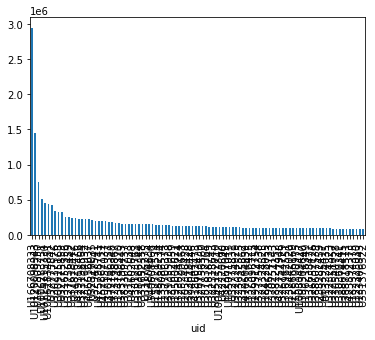

In [7]:
astat.head(100).plot(kind = 'bar')

In [0]:
df['date'] = pandas.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')

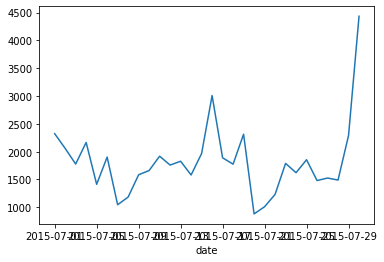

In [11]:
df.groupby(df['date'].dt.date)['action'].count().plot(kind = 'line')

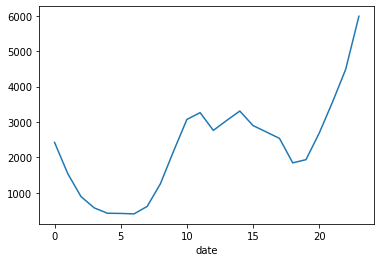

In [12]:
df.groupby(df['date'].dt.hour)['action'].count().plot(kind = 'line')

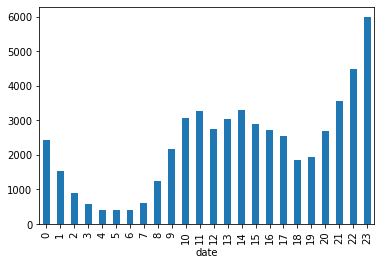

In [13]:
df.groupby(df['date'].dt.hour)['action'].count().plot(kind = 'bar')

## 資料合併

In [0]:
import pandas as pd
df1= pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0,1,2,3])

df2= pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'D': ['D4', 'D5', 'D6', 'D7']},
index=[4,5,6,7])
df3= pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
'B':['B8', 'B9', 'B10', 'B11'],
'C': ['C8', 'C9', 'C10', 'C11'],
'D': ['D8', 'D9', 'D10', 'D11']},
index=[8,9, 10, 11])

In [16]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [17]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [18]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [19]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [20]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [0]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

In [22]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [0]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})


In [24]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [25]:
# SELECT * FROM left INNER JOIN right ON left.key = right.key
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [0]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [27]:
# SELECT * FROM left INNER JOIN right ON left.key1 = right.key1 AND left.key2 = right.key2
pd.merge(left,right,how='inner',on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [28]:
pd.merge(left,right,how='left',on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [29]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2']},
index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
'D': ['D0', 'D2', 'D3']},
index=['K0', 'K2', 'K3'])
left.join(right)


,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


## 正規運算式

In [30]:
s = 'my phone number is 0912456999'
'0912456999' in s

True

In [0]:
import re

In [32]:
s = 'w'
re.match('w', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [34]:
s = 'z'
print(re.match('w', s))

None


In [35]:
# []: match any character within
s = 'z'
print(re.match('[abcdefghijklmnopqrstuvwxyz]', s))

<_sre.SRE_Match object; span=(0, 1), match='z'>


In [36]:
# -: continuous
# [abcdefghijklmnopqrstuvwxyz] => [a-z]
print(re.match('[a-z]', s))

<_sre.SRE_Match object; span=(0, 1), match='z'>


In [37]:
s = 'X'
print(re.match('[a-z]', s))

None


In [38]:
print(re.match('[a-zA-Z]', s))

<_sre.SRE_Match object; span=(0, 1), match='X'>


In [39]:
s = '8'
re.match('[0-9]', s)

<_sre.SRE_Match object; span=(0, 1), match='8'>

In [40]:
# \d: digits
# \d => [0-9]
re.match('\d', s)

<_sre.SRE_Match object; span=(0, 1), match='8'>

In [41]:
# \w => [a-zA-Z0-9]
re.match('\w', s)

<_sre.SRE_Match object; span=(0, 1), match='8'>

In [42]:
# . => any character
s = '$'
re.match('.', s)

<_sre.SRE_Match object; span=(0, 1), match='$'>

In [43]:
s = 'apple'
re.match('\w', s)

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [44]:
# {n}: match exact n charaters
re.match('\w{5}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [45]:
s = 'appledaily'
re.match('\w{5}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [47]:
# {m,n}: at least m characters , at most n charaters
re.match('\w{3,10}', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [48]:
re.match('\w{3,}', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [49]:
re.match('\w{,10}', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [50]:
re.match('\w{0,}', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [51]:
# * => {0,}
re.match('\w*', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [52]:
re.match('\w{1,}', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [53]:
# + => {1,}
re.match('\w+', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [58]:
phones = ['0912345678', '0912-345678', '0912-345-678', '09123456781023812830138012849023840928402840238402']
for p in phones:
  #print(re.match('09\d{8}',p))
  #print(re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}',p))

  # {0,1} => ?
  #print(re.match('09\d{2}-?\d{3}-?\d{3}',p))

  # ^: match begin, $; match end
  print(re.match('^09\d{2}-?\d{3}-?\d{3}$',p))
  

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
None


In [61]:
s = '012-023-034'
re.match('.+?-', s)

<_sre.SRE_Match object; span=(0, 4), match='012-'>

In [62]:
import re
m = re.match("(\w+)@(\w+)", "david@largidata.com")
print(m.groups())

('david', 'largidata')


In [63]:
import re
m = re.match("(\w+)@([\w.]+)", "david@largidata.com")
print(m.groups())

('david', 'largidata.com')


In [65]:
m = re.match("(\d+)\.(\d+)", "1999.5")
print(m.groups())

('1999', '5')


In [66]:
m = re.match("(\w+) (\w+)", "David Chiu")
print(m.groups())

('David', 'Chiu')


In [67]:
m.group(1)

'David'

In [68]:
m.group(2)

'Chiu'

In [69]:
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "David Chiu")
print(m.group('first_name'), m.group('last_name'))

David Chiu


In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col = 0,parse_dates =['search_date'])
#df['layout']

In [0]:
df[['bedroom', 'living_room', 'bathroom', 'balcony']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛(\d+)陽臺').head(100)

In [0]:
#df.head(100)

In [81]:
df['address'].head()

0      高雄市湖內區民生街
1      新北市蘆洲區長安街
2    新北市永和區中山路一段
3      屏東縣潮州鎮六合路
4      桃園市觀音區四維路
Name: address, dtype: object

In [83]:
df['address'].str.extract('(.+[市縣])(.+[區鎮])(.+[街路])')

,0,1,2
0,高雄市,湖內區,民生街
1,新北市,蘆洲區,長安街
2,新北市,永和區,中山路
3,屏東縣,潮州鎮,六合路
4,桃園市,觀音區,四維路
...,...,...,...
70310,新竹市,東區,中華路
70311,高雄市,前金區,大同二路
70312,台中市,西屯區,福星路
70313,高雄市,大社區,中華路


In [0]:
import requests
from bs4 import BeautifulSoup
titles = []
for i in range(3286, 3287):
  res = requests.get('https://www.ptt.cc/bbs/creditcard/index{}.html'.format(i))
  soup = BeautifulSoup(res.text, 'lxml')
  for t in soup.select('.title a'):
    titles.append(t.text)

In [0]:
titles = ['[問題] 遠東 被盜刷',
 '[新聞]搶百萬繳稅大戶 中信銀加碼現金回饋率至0 ',
 '[情報] U熊卡租GoShare 10%回饋',
 '[心得] 中信 台新 國泰 永久調額 ',
 'Re: [心得] 台北車站iLounge(聯邦銀行卡友)',
 '[問題] 關於國外刷卡手續費的疑問',
 '[心得] 台新Friday卡 小白核卡',
 '[問題] 請問Paypal使用後要把信用卡刪除嗎?',
 '[心得] 台新街口聯名卡 核卡',
 '［問題］想請教各位我的卡片問題請益',
 '[心得] 永豐大戶 學生小白核卡',
 '[情報] 國泰亞萬《快閃10天哩程衝刺術》',
 '[情報] 凱基銀行靜態密碼驗證服務終止公告',
 '[討論] 有現在雙狗的用法嗎',
 '[閒聊] 你們在 聯徵的 信用評分 幾分 ?',
 'Re: [問題] 全國加油站這樣的加油方式可嗎？',
 '[心得] 台中銀行世界卡 核卡',
 '[心得] 新光寰宇現金回饋卡 核卡']

##小任務
－　請協助我寫一個正規表達法，抽取 [] 內的文字，　並進行數量統計?
  - (提示) 用\[ \] 把他的意思轉換為單純括弧

In [0]:
# \[ \]

In [90]:
import re
s = 'my phone is 0912345678'
#re.match('09\d{8}', s)
m = re.match('.+?(09\d{8})', s)
print(m.group(1))

0912345678


In [91]:
import re
s = 'my phone is 0912345678'
#re.match('09\d{8}', s)
m = re.search('(09\d{8})', s)
print(m.group(1))

0912345678


In [94]:
for t in titles:
  # [   \[ ［   ] 
  m = re.search('[\[［](.+)[\]］]', t)
  if m:
    print(m.group(1))

問題
新聞
情報
心得
心得
問題
心得
問題
心得
問題
心得
情報
情報
討論
閒聊
問題
心得
心得


## Pandas IO

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col = 0)
df2 = df.head(100)

In [0]:
df2.to_excel('591file.xlsx')

In [0]:
df2.to_csv('591_2.tsv',sep= '\t')

In [0]:
#df2.to_json()

In [0]:
import pandas
#df3 = pandas.read_clipboard()
#df3

In [0]:
import pandas
dfs = pandas.read_html('https://money.udn.com/rank/newest/1001/0/1')

In [106]:
len(dfs)

1

In [108]:
dfs[0].head()

,標題,類別,出版時間
0,曾接觸武漢肺炎確診者 美FDA局長自主隔離14天,國際,05/09 16:12
1,美參眾兩院致函各國籲挺台參與WHA 外交部感謝,產業,05/09 16:12
2,兩岸條例刪國家統一付委 國台辦：密切關注,兩岸,05/09 16:06
3,決議案提不提WHO 美中角力安理會陷僵局,國際,05/09 16:06
4,疫情升溫緊張 美縮減中國記者簽證效期至90天,國際,05/09 16:06


In [0]:
import requests
url = 'https://mops.twse.com.tw/mops/web/ajax_t163sb19'
payload = {
'encodeURIComponent': '1',
'step': '1',
'firstin': '1',
'TYPEK': 'sii',
'code': '24',
'year': '109',
'season': '01'}
res = requests.post(url, data = payload)

In [0]:
import pandas
dfs = pandas.read_html(res.text)

In [116]:
df = dfs[0]
df[df['產業別'] != '加權平均數'].head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,3034,聯詠科技股份有限公司,半導體業,3.63,新台幣 10.0000元,16891154.0,2600967.0,130596.0,2211132.0
2,8081,致新科技股份有限公司,半導體業,2.73,新台幣 10.0000元,1621896.0,268965.0,19309.0,242475.0
3,4967,十銓科技股份有限公司,半導體業,2.28,新台幣 10.0000元,1546903.0,183696.0,7082.0,151182.0
5,6271,同欣電子工業股份有限公司,半導體業,1.65,新台幣 10.0000元,1953205.0,309700.0,34028.0,272348.0
6,8271,宇瞻科技股份有限公司,半導體業,1.53,新台幣 10.0000元,1964380.0,194455.0,3399.0,154841.0


## 資料庫操作

In [0]:
import sqlite3 as lite
con = lite.connect('test.sqlite')
con.close()

In [119]:
import sqlite3 as lite
con = lite.connect('test.sqlite')
cur = con.cursor()
cur.execute('SELECT SQLITE_VERSION()')
data = cur.fetchone()
print(data)
con.close()

('3.22.0',)


In [120]:
import sqlite3 as lite
with lite.connect('test.sqlite') as con:
  cur = con.cursor()
  cur.execute('SELECT SQLITE_VERSION()')
  data = cur.fetchone()
  print(data)

('3.22.0',)


In [0]:
import sqlite3 as lite
with lite.connect("test.sqlite") as con:
  cur = con.cursor()
  cur.execute("DROP TABLE IF EXISTS PhoneAddress")
  cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INTNOT NULL)")
  cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)")
  cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)")
  cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)")


In [122]:
import sqlite3 as lite
with lite.connect("test.sqlite") as con:
  cur = con.cursor()
  cur.execute("SELECT phone,address FROM PhoneAddress")
  data = cur.fetchall()
  for rec in data:
    print(rec)


('0912173381', 'United State')
('0928375018', 'Tokyo Japan')
('0957209108', 'Taipei')


In [123]:
import sqlite3 as lite
with lite.connect("test.sqlite") as con:
  cur = con.cursor()
  cur.execute("SELECT phone,address FROM PhoneAddress")
  data = cur.fetchone()
  print(data)
  data = cur.fetchall()
  print(data)


('0912173381', 'United State')
[('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [0]:
import pandas
employee = [{'name':'Mary', 'age':23 , 'gender': 'F'},{'name':'John','age':33 , 'gender': 'M'}]
df = pandas.DataFrame(employee)


In [125]:
df

,name,age,gender
0,Mary,23,F
1,John,33,M


In [0]:
with lite.connect('test.sqlite') as db:
  df.to_sql(name = 'employee', index = False, con = db, if_exists='replace')

In [128]:
with lite.connect('test.sqlite') as db:
  df2 = pandas.read_sql_query('SELECT * FROM employee WHERE age >= 30;', con = db)
df2

,name,age,gender
0,John,33,M


##完整儲存案例

In [129]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col = 0)
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70315 entries, 0 to 70314
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   detail_url     70315 non-null  object 
 1   search_date    70315 non-null  object 
 2   title          70315 non-null  object 
 3   address        70315 non-null  object 
 4   floor_info     69686 non-null  object 
 5   price          70315 non-null  object 
 6   layout         22630 non-null  object 
 7   building_area  70315 non-null  float64
 8   building_use   65330 non-null  object 
 9   latitude       70315 non-null  float64
 10  longitude      70315 non-null  float64
dtypes: float64(3), object(8)
memory usage: 6.4+ MB


In [131]:
df.isnull().sum()

detail_url           0
search_date          0
title                0
address              0
floor_info         629
price                0
layout           47685
building_area        0
building_use      4985
latitude             0
longitude            0
dtype: int64

In [0]:
df['search_date'] = pandas.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [0]:
df['price'] = df['price'].map(lambda e: int(e.replace('元/月', '').replace(',','')))

In [0]:
df = df[df['building_use'].notnull()]

In [0]:
df['btype'] = df['building_use'].map(lambda e: e.split('/')[0] )
df['buse'] = df['building_use'].map(lambda e: e.split('/')[1] )

In [0]:
df[['floor','total_floor']] = df['floor_info'].str.extract('(\d+)F/(\d+)F')

In [0]:
df[['bedroom', 'living_room', 'bathroom', 'balcony']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛(\d+)陽臺')

In [146]:
df.columns 

Index(['detail_url', 'search_date', 'title', 'address', 'floor_info', 'price',
       'layout', 'building_area', 'building_use', 'latitude', 'longitude',
       'btype', 'buse', 'floor', 'total_floor', 'bedroom', 'living_room',
       'bathroom', 'balcony'],
      dtype='object')

In [0]:
df = df[[ 'price','bedroom', 'living_room','bathroom', 'balcony', 'building_area', 
       'btype', 'buse', 'floor', 'total_floor']]


In [0]:
df.dropna(inplace=True)

In [0]:
btype = pandas.get_dummies(df['btype'])
buse = pandas.get_dummies(df['buse'])

In [152]:
m = pandas.concat([df, btype, buse], axis = 1)
m.head()

,price,bedroom,living_room,bathroom,balcony,building_area,btype,buse,floor,total_floor,倉庫,公寓,其他,別墅,廠房,廠辦,透天厝,電梯大樓,住辦,其他,整層住家
5,22000,2,1,1,1,24.00,電梯大樓,整層住家,9,11,0,0,0,0,0,0,0,1,0,0,1
9,17000,2,1,2,2,32.00,電梯大樓,整層住家,14,18,0,0,0,0,0,0,0,1,0,0,1
13,7500,2,2,1,1,24.00,電梯大樓,整層住家,7,8,0,0,0,0,0,0,0,1,0,0,1
15,25000,4,3,3,3,78.00,電梯大樓,整層住家,2,9,0,0,0,0,0,0,0,1,0,0,1
16,15000,1,1,1,0,18.01,電梯大樓,整層住家,19,21,0,0,0,0,0,0,0,1,0,0,1


In [0]:
del m['btype']
del m['buse']

In [159]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19836 entries, 5 to 70308
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19836 non-null  int64  
 1   bedroom        19836 non-null  object 
 2   living_room    19836 non-null  object 
 3   bathroom       19836 non-null  object 
 4   balcony        19836 non-null  object 
 5   building_area  19836 non-null  float64
 6   floor          19836 non-null  object 
 7   total_floor    19836 non-null  object 
 8   倉庫             19836 non-null  uint8  
 9   公寓             19836 non-null  uint8  
 10  其他             19836 non-null  uint8  
 11  別墅             19836 non-null  uint8  
 12  廠房             19836 non-null  uint8  
 13  廠辦             19836 non-null  uint8  
 14  透天厝            19836 non-null  uint8  
 15  電梯大樓           19836 non-null  uint8  
 16  住辦             19836 non-null  uint8  
 17  其他             19836 non-null  uint8  
 18  整層住家  

In [0]:
for c in m.select_dtypes('object').columns:
  m[c] = m[c].astype(int)

In [163]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19836 entries, 5 to 70308
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19836 non-null  int64  
 1   bedroom        19836 non-null  int64  
 2   living_room    19836 non-null  int64  
 3   bathroom       19836 non-null  int64  
 4   balcony        19836 non-null  int64  
 5   building_area  19836 non-null  float64
 6   floor          19836 non-null  int64  
 7   total_floor    19836 non-null  int64  
 8   倉庫             19836 non-null  uint8  
 9   公寓             19836 non-null  uint8  
 10  其他             19836 non-null  uint8  
 11  別墅             19836 non-null  uint8  
 12  廠房             19836 non-null  uint8  
 13  廠辦             19836 non-null  uint8  
 14  透天厝            19836 non-null  uint8  
 15  電梯大樓           19836 non-null  uint8  
 16  住辦             19836 non-null  uint8  
 17  其他             19836 non-null  uint8  
 18  整層住家  

In [164]:
m.head()

,price,bedroom,living_room,bathroom,balcony,building_area,floor,total_floor,倉庫,公寓,其他,別墅,廠房,廠辦,透天厝,電梯大樓,住辦,其他,整層住家
5,22000,2,1,1,1,24.00,9,11,0,0,0,0,0,0,0,1,0,0,1
9,17000,2,1,2,2,32.00,14,18,0,0,0,0,0,0,0,1,0,0,1
13,7500,2,2,1,1,24.00,7,8,0,0,0,0,0,0,0,1,0,0,1
15,25000,4,3,3,3,78.00,2,9,0,0,0,0,0,0,0,1,0,0,1
16,15000,1,1,1,0,18.01,19,21,0,0,0,0,0,0,0,1,0,0,1


In [0]:
m.columns = ['price', 'bedroom', 'living_room', 'bathroom', 'balcony',
       'building_area', 'floor', 'total_floor', '倉庫', '公寓', '其他', '別墅', '廠房',
       '廠辦', '透天厝', '電梯大樓', '住辦', '其他1', '整層住家']

In [0]:
import sqlite3 as lite
with lite.connect('house.sqlite') as db:
  m.to_sql('rent_591', con = db, if_exists = 'replace')

In [173]:
import sqlite3 as lite
with lite.connect('house.sqlite') as db:
  #df2 = pandas.read_sql_query('select * from rent_591 limit 10', con = db)
  #df2 = pandas.read_sql_query('select * from rent_591 where  price > 10000 limit 10', con = db)
  #df2 = pandas.read_sql_query('select building_area, price from rent_591 where  price > 10000 limit 10', con = db)
  #df2 = pandas.read_sql_query('select building_area, price from rent_591 where  price > 10000 order by price desc limit 10', con = db)
  df2 = pandas.read_sql_query('select building_area, price from rent_591 where  price > 10000 order by price desc limit 10', con = db)
df2

,building_area,price
0,265.00,550000
1,265.00,550000
2,270.00,550000
3,266.00,550000
4,228.80,480000
5,166.76,387654
6,136.00,380000
7,138.88,360000
8,138.60,360000
9,94.00,360000


##小作業
- 請蒐集證交所109年度第一季所有上市公司各產業EPS統計資訊(https://mops.twse.com.tw/mops/web/t163sb19)
- 使用Pandas 整理出資料表格
- 請找出各產業基本每股盈餘(元)的第一名
- 最後將資料儲存於 SQLite 中